In [29]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [30]:
data = pd.read_excel('9MayOH.xlsx')
print("Read the source excel")

Read the source excel


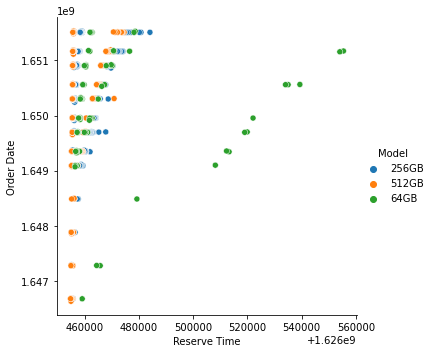

In [31]:
import seaborn as sns

sns.relplot(x="Reserve Time", y="Order Date", hue="Model", data=data)

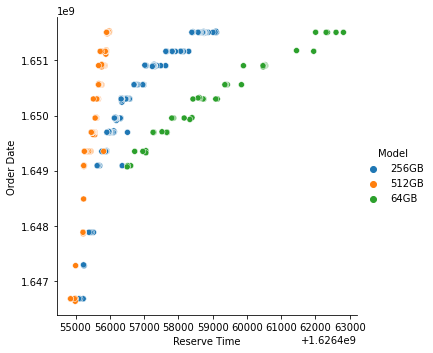

In [32]:
import seaborn as sns

data_t = data[(data['Region'] == 'US') ]


sns.relplot(x="Reserve Time", y="Order Date", hue="Model", data=data_t)

In [33]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

In [34]:
data

,Region,Model,Reserve Time,Quarter,Order Date
0,EU,256GB,1626484083,Q2,1651509514
1,EU,256GB,1626480788,Q2,1651509360
2,EU,256GB,1626480191,Q2,1651509000
3,EU,256GB,1626478291,Q2,1651509660
4,EU,256GB,1626477129,Q2,1651509240
...,...,...,...,...,...
862,US,64GB,1626456963,Q2,1649349131
863,US,64GB,1626456725,Q2,1649349180
864,US,64GB,1626456608,Q2,1649089800
865,US,64GB,1626456519,Q2,1649089800


In [35]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

ordinal_enc = OrdinalEncoder()

sdata = pd.DataFrame(ordinal_enc.fit_transform(data[object_cols]))

v_data = data.drop(object_cols, axis=1)

data = pd.concat([ sdata,v_data], axis=1)

print("Ordinal Encode Category Columns")

Ordinal Encode Category Columns


In [36]:
y = data.iloc[:, -1]

X = data.iloc[:, 0:4]
X

,0,1,2,Reserve Time
0,0.0,0.0,1.0,1626484083
1,0.0,0.0,1.0,1626480788
2,0.0,0.0,1.0,1626480191
3,0.0,0.0,1.0,1626478291
4,0.0,0.0,1.0,1626477129
...,...,...,...,...
862,2.0,2.0,1.0,1626456963
863,2.0,2.0,1.0,1626456725
864,2.0,2.0,1.0,1626456608
865,2.0,2.0,1.0,1626456519


In [37]:
#Do a test train split
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=1)
print("Test Train Split")

Test Train Split


In [38]:
#use linear regression to train the model and score the accuracy of the model
model = LinearRegression().fit(X_train, y_train)
r_sq = model.score(X_valid, y_valid)
print(r_sq * 100)

57.304445695583


In [46]:
#Region	Model	Timestamp	ValveEstimate
d = [{'Region': 'EU', 'Model': '64GB', "Reserve Time": 1626555348, "Quarter": 'Q1'},
     {'Region': 'EU', 'Model': '512GB', "Reserve Time": 1626472389, "Quarter": 'Q2'},
     {'Region': 'UK', 'Model': '256GB', "Reserve Time": 1626484083, "Quarter": 'Q2'},
     {'Region': 'US', 'Model': '64GB', "Reserve Time": 1626462816, "Quarter": 'Q2'},
     {'Region': 'US', 'Model': '64GB', "Reserve Time": 1626469138, "Quarter": 'Q2'}]
df = pd.DataFrame(data=d)

#ordinal encode prediction data
t_data = pd.DataFrame(ordinal_enc.fit_transform(df[object_cols]))

d_data = df.drop(object_cols, axis=1)

df = pd.concat([ t_data,d_data], axis=1)

print(df[4:5])

res  = model.predict(df[4:5])
print("{0:.0f}".format(res[0]))

import datetime  

date_time = datetime.datetime.fromtimestamp( res[0] )
print(date_time)

     0    1    2  Reserve Time
4  2.0  2.0  1.0    1626469138
1650490118
2022-04-21 00:28:37.767803


In [11]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

my_pipeline = XGBRegressor()

my_pipeline.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [60]:
r_sq = my_pipeline.score(X_valid, y_valid.values.ravel())
print(r_sq * 100)

92.11570922119493


In [61]:
from sklearn.metrics import mean_absolute_error

preds = my_pipeline.predict(X_valid)
print(mean_absolute_error(y_valid, preds))

130110.95977011495


In [217]:
#Region	Model	Timestamp	ValveEstimate

res  = my_pipeline.predict(df[3:4])
print("{0:.0f}".format(res[0]))

1651513216


In [35]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=100, max_depth=2, random_state=1)

regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=1)

In [36]:
r_sq = regr.score(X_valid, y_valid.values.ravel())
print(r_sq * 100)

46.57289677722888


In [38]:
res  = regr.predict(df)
print("{0:.0f}".format(res[0]))

1650222075
